# Лабораторная работа 5

# Зухир Амира Саидовна

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings

warnings.filterwarnings("ignore", message="'squared' is deprecated")

In [2]:
data = pd.read_csv('web_traffic.tsv', delimiter='\t', names=['hour', 'n_requests'])
data1 = data.dropna()
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 742
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hour        735 non-null    int64  
 1   n_requests  735 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 17.2 KB


# Присвоение переменных

In [3]:
input_var = 'hour'
target_var = 'n_requests'
hours_data = data[input_var].values
requests_data = data[target_var].values

# Границы данных для обучения и тестирования

In [4]:
train_border_weeks = 3
final_border_weeks = 4.2

train_data_border = int(train_border_weeks * 7 * 24)
final_data_border = int(final_border_weeks * 7 * 24)
border_70 = int(round(train_data_border + (final_data_border - train_data_border) * 0.7, 0))

print(train_data_border)
print(border_70)
print(final_data_border)

504
645
705


# Разделение данных на обучающие и тестовые

In [5]:
hours_data_train = hours_data[train_data_border:border_70]
requests_data_train = requests_data[train_data_border:border_70]
hours_data_test = hours_data[border_70:final_data_border]
requests_data_test = requests_data[border_70:final_data_border]

print(hours_data_train[:5], requests_data_train[:5], hours_data_test[:5], requests_data_test[:5])

[505 506 507 508 509] [1874. 1816. 1097. 2015. 2241.] [646 647 648 649 650] [3009. 2538. 2782. 2491. 2408.]


# Вычисление полиномов и метрик

In [6]:
def calculate_metrics(degree, hours_data_train, requests_data_train):
    f2p, _, _, _, _ = np.polyfit(hours_data_train, requests_data_train, degree, full=True)
    fx = np.poly1d(f2p)
    mse = mean_squared_error(requests_data_train, fx(hours_data_train), squared=True)
    rmse = mean_squared_error(requests_data_train, fx(hours_data_train), squared=False)
    mae = mean_absolute_error(requests_data_train, fx(hours_data_train))
    r2 = r2_score(requests_data_train, fx(hours_data_train))
    return fx, mse, rmse, mae, r2

# Вычисление и вывод метрик для полиномов степени 1, 2 и 3

In [7]:
for degree in range(1, 4):
    fx, mse, rmse, mae, r2 = calculate_metrics(degree, hours_data_train, requests_data_train)
    print(f'Степень полинома {degree}: r2={r2}, mse={mse}, rmse={rmse}, mae={mae}')

Степень полинома 1: r2=0.07191065697741139, mse=141406.31294974717, rmse=376.04030761308974, mae=289.8492660707468
Степень полинома 2: r2=0.07707590442569234, mse=140619.3212634126, rmse=374.9924282747754, mae=289.33124206871247
Степень полинома 3: r2=0.11072716333080568, mse=135492.12043553538, rmse=368.0925433033592, mae=281.40729322826326


# Визуализация данных и полиномов

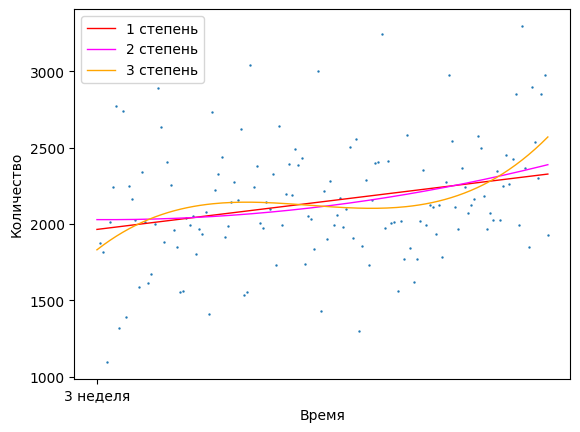

In [8]:
plt.scatter(hours_data_train, requests_data_train, s=0.5)
plt.xlabel('Время')
plt.ylabel('Количество')
plt.xticks([w*7*24 for w in range(6)], [f"{w} неделя" for w in range(6)])
f2x = np.linspace(train_data_border, border_70, len(hours_data_train))
colors = ['red', 'magenta', 'orange']
labels = ['1 степень', '2 степень', '3 степень']
for degree, color, label in zip(range(1, 4), colors, labels):
    fx, _, _, _, _ = calculate_metrics(degree, hours_data_train, requests_data_train)
    plt.plot(f2x, fx(f2x), linewidth=1.0, color=color, label=label)
plt.autoscale(tight=False)
plt.legend()
plt.show()

# Итеративное обучение и оценка моделей

In [9]:
train_border = 3
final_border = 4.2
train_data_border = int(train_border * 7 * 24)
final_data_border = int(final_border * 7 * 24)
border = train_data_border + 5
while border < final_data_border:
    hours_data_train = hours_data[train_data_border:border]
    requests_data_train = requests_data[train_data_border:border]
    percentage_test = round((final_data_border - border) / (final_data_border - train_data_border) * 100, 1)
    percentage_train = round(100 - percentage_test, 1)
    print(f'тренировочная={percentage_train}%, тестовая={percentage_test}%')
    for degree in range(1, 4):
        fx, mse, rmse, mae, _ = calculate_metrics(degree, hours_data_train, requests_data_train)
        print(f'Полиномиальная степень {degree}: mse={round(mse, 2)}, rmse={round(rmse, 2)}, mae={round(mae, 2)}')
    border += 5

тренировочная=2.5%, тестовая=97.5%
Полиномиальная степень 1: mse=130645.66, rmse=361.45, mae=284.64
Полиномиальная степень 2: mse=61188.16, rmse=247.36, mae=211.52
Полиномиальная степень 3: mse=61168.94, rmse=247.32, mae=211.52
тренировочная=5.0%, тестовая=95.0%
Полиномиальная степень 1: mse=278825.28, rmse=528.04, mae=430.96
Полиномиальная степень 2: mse=273170.86, rmse=522.66, mae=439.24
Полиномиальная степень 3: mse=268296.71, rmse=517.97, mae=444.0
тренировочная=7.5%, тестовая=92.5%
Полиномиальная степень 1: mse=210830.89, rmse=459.16, mae=357.69
Полиномиальная степень 2: mse=204927.01, rmse=452.69, mae=353.91
Полиномиальная степень 3: mse=203472.22, rmse=451.08, mae=352.53
тренировочная=10.0%, тестовая=90.0%
Полиномиальная степень 1: mse=217920.55, rmse=466.82, mae=386.31
Полиномиальная степень 2: mse=215995.28, rmse=464.75, mae=384.06
Полиномиальная степень 3: mse=185240.88, rmse=430.4, mae=352.25
тренировочная=12.4%, тестовая=87.6%
Полиномиальная степень 1: mse=189740.22, rmse=4